In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

In [30]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data_ananna/diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [31]:
df.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, 'Number')

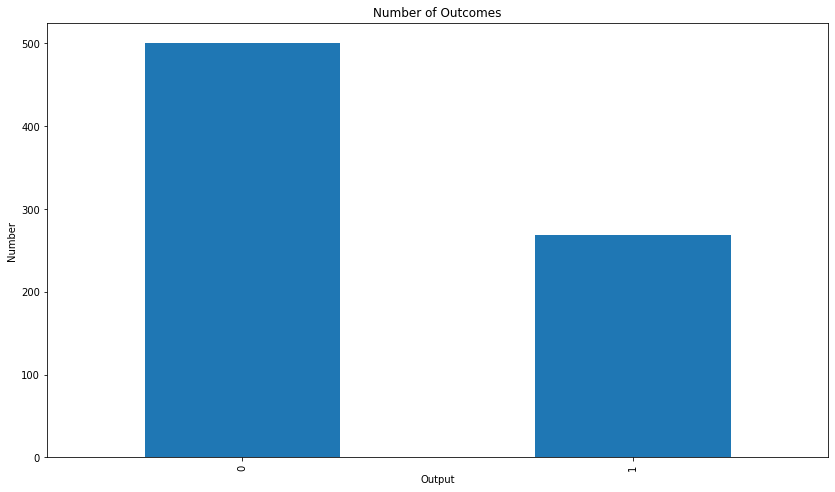

In [9]:
ax = df['Outcome'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Outcomes")
ax.set_xlabel("Output")
ax.set_ylabel("Number")

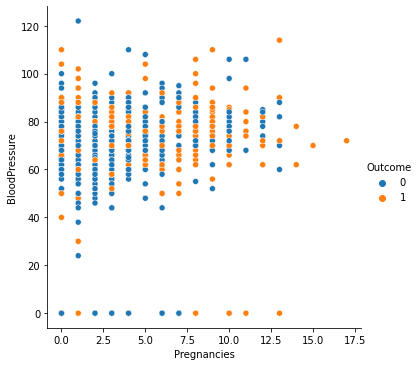

In [12]:
sns.relplot(data=df, x="Pregnancies", y="BloodPressure", hue="Outcome")

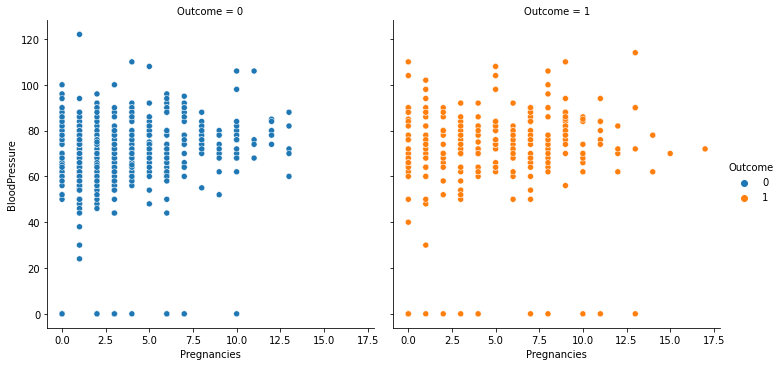

In [13]:
sns.relplot(data=df, x="Pregnancies", y="BloodPressure", hue="Outcome", col="Outcome", col_wrap=2)

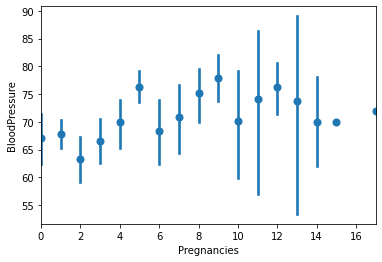

In [15]:
ax = sns.regplot(x="Pregnancies", y="BloodPressure", data=df,
                 x_estimator=np.mean, logx=True)

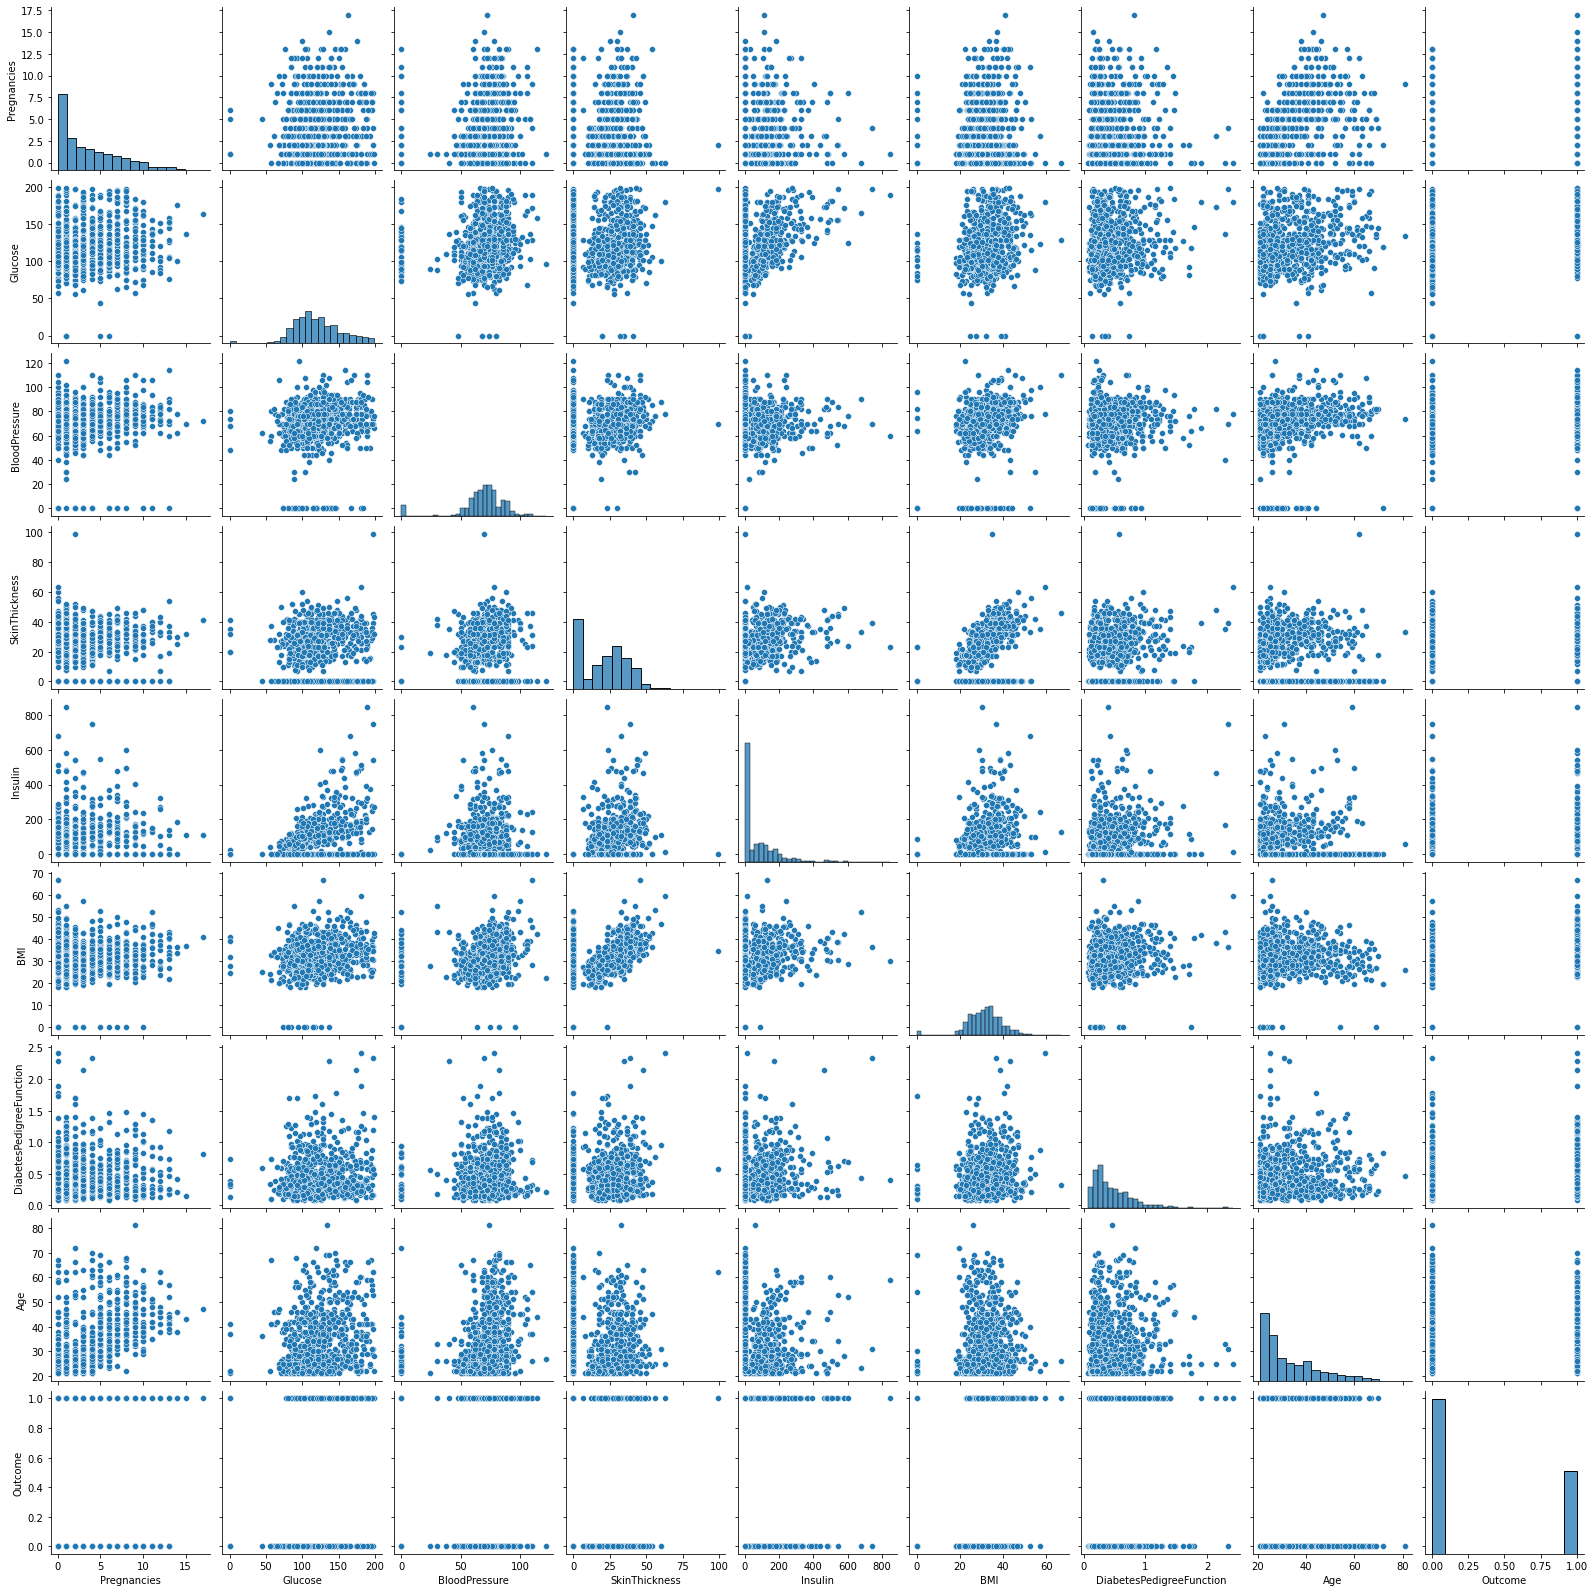

In [16]:
sns.pairplot(df)

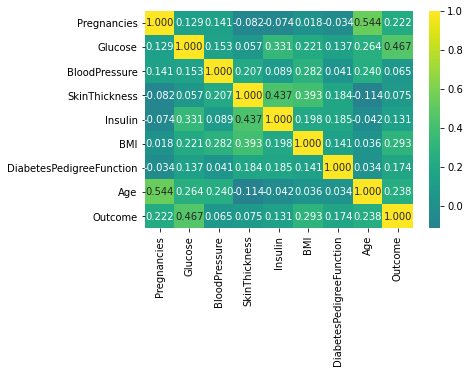

In [17]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Pregnancies',
             'Glucose','BloodPressure',
             'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

features_tf = pd.DataFrame(data=df)
features_tf[numerical] = scaler.fit_transform(features_tf[numerical])
features_tf.head()

Pregnancies   Glucose  ...       Age  Outcome
0     0.352941  0.743719  ...  0.483333        1
1     0.058824  0.427136  ...  0.166667        0
2     0.470588  0.919598  ...  0.183333        1
3     0.058824  0.447236  ...  0.000000        0
4     0.000000  0.688442  ...  0.200000        1

[5 rows x 9 columns]

In [34]:
X = features_tf.drop("Outcome",axis = 1)
y = features_tf.Outcome

In [33]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(random_state = 123)

In [35]:
X_over, y_over = oversampling.fit_resample(X,y)

In [36]:
X_over = pd.DataFrame(X_over, columns=X.columns)
y_over = pd.DataFrame(y_over)
y_over.value_counts()

1    500
0    500
dtype: int64

In [37]:
X.head()

Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0     0.352941  0.743719  ...                  0.234415  0.483333
1     0.058824  0.427136  ...                  0.116567  0.166667
2     0.470588  0.919598  ...                  0.253629  0.183333
3     0.058824  0.447236  ...                  0.038002  0.000000
4     0.000000  0.688442  ...                  0.943638  0.200000

[5 rows x 8 columns]

Splitting

In [42]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over, shuffle=True,train_size = 0.75,random_state=42, stratify=y_over)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 8) (250, 8) (750, 1) (250, 1)


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.784


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [52]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.852
Accuracy on test set: 0.800


# Accuracy Increased from .703 to .800 means 70 to 80 percent for Decision Tree after Minmax scalling and oversampling and tree max dept size to 6

In [53]:
y_pred = dt.predict(X_test)


In [55]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 91  34]
 [ 16 109]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       125
           1       0.76      0.87      0.81       125

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250



In [56]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

In [57]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


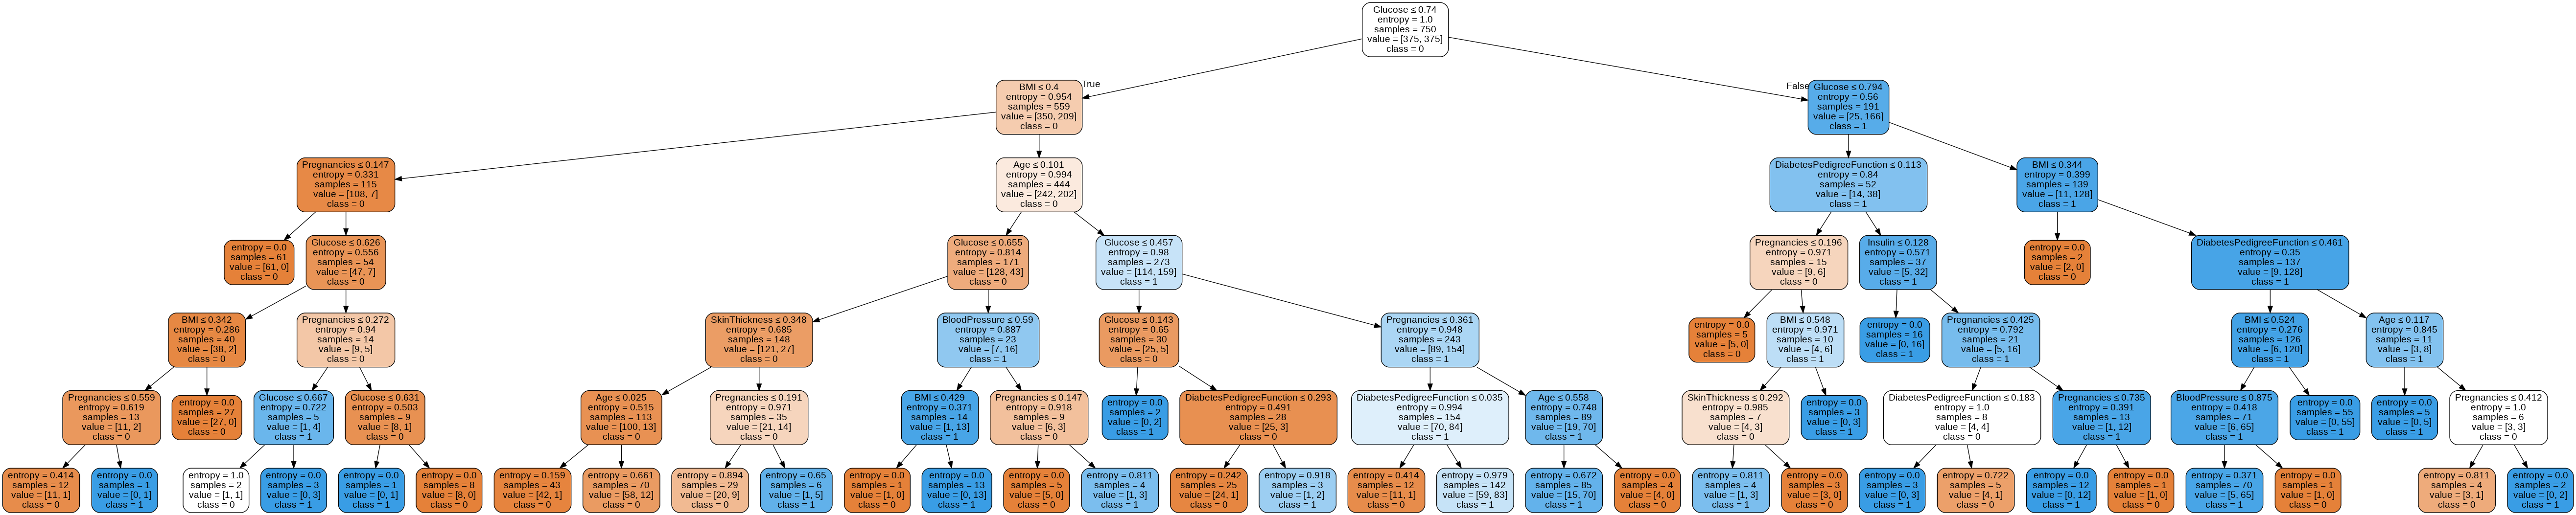

In [58]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Dicision Tree: ROC AUC=0.800


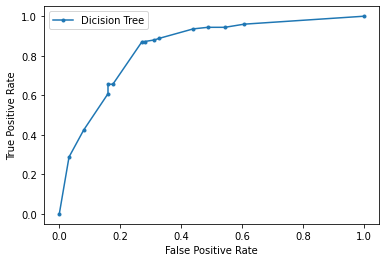

In [60]:
#Plot ROC chart for DT.Write your code below.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = dt.predict_proba(X_test)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(y_test, y_pred)

print('Dicision Tree: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(y_test, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='Dicision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


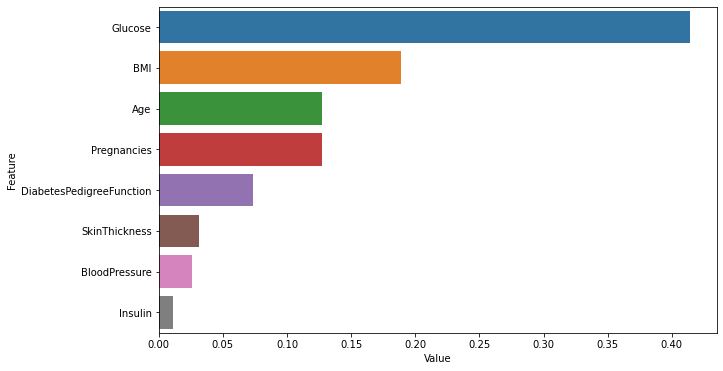

In [61]:
#find out the feature importance from the decision tree built above. Write your code below.
feature_importance = pd.DataFrame(sorted(zip(dt.feature_importances_, X_train.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))

# NN

In [78]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.68959526
Iteration 2, loss = 0.68432850
Iteration 3, loss = 0.68019399
Iteration 4, loss = 0.67666091
Iteration 5, loss = 0.67354745
Iteration 6, loss = 0.67054949
Iteration 7, loss = 0.66776721
Iteration 8, loss = 0.66458239
Iteration 9, loss = 0.66138110
Iteration 10, loss = 0.65775298
Iteration 11, loss = 0.65380489
Iteration 12, loss = 0.64987377
Iteration 13, loss = 0.64598809
Iteration 14, loss = 0.64237568
Iteration 15, loss = 0.63858766
Iteration 16, loss = 0.63508727
Iteration 17, loss = 0.63119461
Iteration 18, loss = 0.62732711
Iteration 19, loss = 0.62345872
Iteration 20, loss = 0.61958765
Iteration 21, loss = 0.61592008
Iteration 22, loss = 0.61173166
Iteration 23, loss = 0.60759124
Iteration 24, loss = 0.60378289
Iteration 25, loss = 0.59986499
Iteration 26, loss = 0.59601661
Iteration 27, loss = 0.59198501
Iteration 28, loss = 0.58807118
Iteration 29, loss = 0.58456761
Iteration 30, loss = 0.58048369
Iteration 31, loss = 0.57691511
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [79]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.78
[[ 95  30]
 [ 25 100]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       125
           1       0.77      0.80      0.78       125

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



In [80]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.780


# Testing Accuracy for NN increased from .73 to .78 after increasing hidden layer size 10 to 20

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

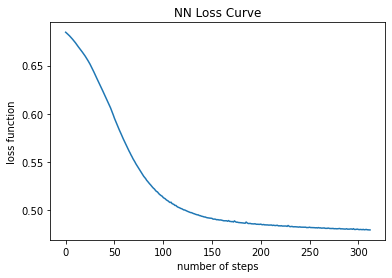

In [66]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [67]:
#check out weights

In [68]:
(mlp.intercepts_[0]).shape

(10,)

In [69]:
(mlp.coefs_[0]).shape

(8, 10)

In [70]:
mlp.intercepts_[0]

array([-0.31780539, -0.48246975,  0.52805009,  0.88102293,  0.01520921,
       -0.3026748 , -0.57771808,  0.04070443, -0.14878569,  0.25582906])

In [71]:
mlp.coefs_[0]

array([[ 1.60895956e-01, -1.27658604e-02, -5.62551412e-01,
         2.28380180e-01, -6.58205410e-02,  1.73356793e-01,
         7.53509452e-02, -6.16026629e-02, -6.16502479e-04,
         4.85225228e-01],
       [ 7.69342020e-01,  8.93146827e-22, -3.23709503e-01,
        -3.50505072e-01,  1.38944140e-01,  5.65160548e-01,
         7.22740477e-01, -3.47664947e-01, -2.80310161e-15,
         8.27592370e-01],
       [-1.16034374e-01, -8.13433756e-19,  1.55793626e-01,
         4.90842193e-01,  1.23089394e-01, -1.71224568e-01,
         2.64224107e-01,  6.03355589e-01, -3.89711980e-03,
         5.48599880e-01],
       [ 5.82257621e-01,  6.65132492e-14,  6.10174175e-01,
         5.27362961e-01, -1.43468505e-01, -8.52133874e-02,
         3.40191113e-01, -2.46215846e-02, -2.76457656e-20,
         6.11704019e-01],
       [-3.58463801e-01,  1.39204500e-11,  2.79717232e-01,
         4.22091352e-01,  2.79335399e-01,  4.35375366e-01,
        -1.26124115e-02, -2.97300606e-01,  1.19630551e-25,
        -3.

NN: ROC AUC=0.800


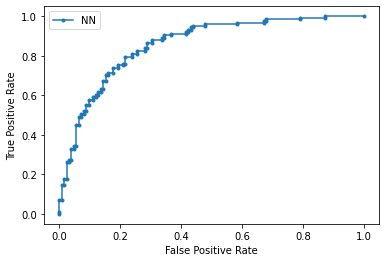

In [82]:
#Plot ROC chart for DT.Write your code below.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = mlp.predict_proba(X_test)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(y_test, y_pred)

print('NN: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(y_test, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='NN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


# SVM

In [86]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)



svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)

from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  


r= 0.1 C= 1
Accuracy= 0.744
[[95 30]
 [34 91]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       125
           1       0.75      0.73      0.74       125

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250

r= 0.1 C= 10
Accuracy= 0.76
[[98 27]
 [33 92]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       125
           1       0.77      0.74      0.75       125

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250

r= 1 C= 1
Accuracy= 0.764
[[96 29]
 [30 95]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       125
           1       0.77      0.76      0.76       125

    accuracy                           0.76

# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

LGBM

In [87]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier()
lgbmc.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
preds =lgbmc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       125
           1       0.80      0.86      0.83       125

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



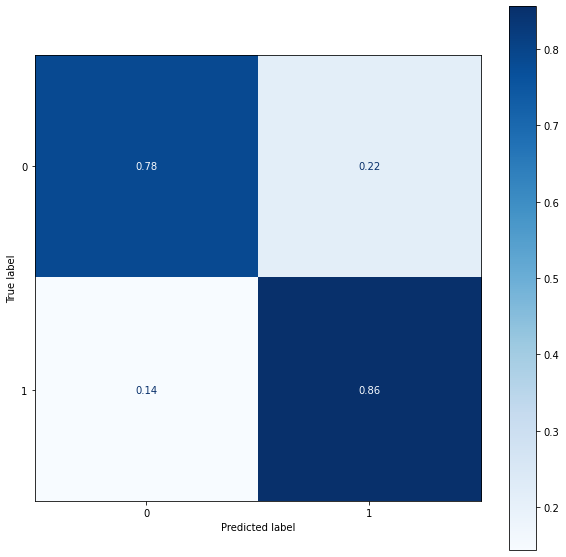

In [95]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Outcome'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lgbmc, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,preds)
print(cf_matrix)

[[ 98  27]
 [ 18 107]]


In [99]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [100]:
preds =ET.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       125
           1       0.81      0.90      0.85       125

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



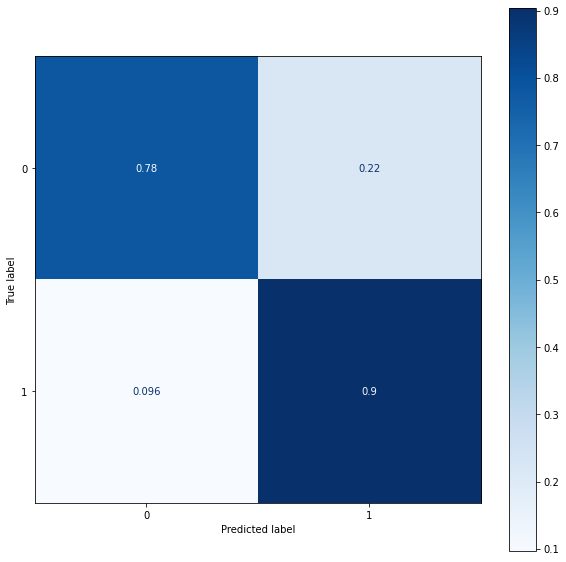

In [102]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Outcome'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(ET, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,preds)
print(cf_matrix)

[[ 98  27]
 [ 12 113]]


# We have tried two new model one is Light gradient boosting and extra tree classifier and both have them have higher accuracy then before which is 82 and 84 percent respectively.

# deployment 

In [104]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(ET, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)


[1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1]


In [ ]:
#score the model on a scoring data set

#diabetes_score_data = pd.read_csv('.....csv')

#sc_X = StandardScaler()
#X =  sc_X.fit_transform(diabetes_score_data)

#pred = loaded_model.predict(X)
#print(pred)

